## Optional: Deep Learning Method (e.g., Word2Vec, BERT)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from gensim.models import word2vec
import gensim.models.keyedvectors as word2vec
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
import spacy
import string
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
# Download the dataset
!gdown --id 1NdvIddoyYy2idsAWxJ8lodKfD-PZhmyL

c:\Users\moham\Desktop\Projects\cyshield\.conda\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	('Connection aborted.', RemoteDisconnected('Remote end closed
	connection without response'))

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [3]:
# Read into a pandas dataframe
df = pd.read_csv("in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])[['label', 'sentence']]
df

,label,sentence
0,1,"Our friends won't buy this analysis, let alone..."
1,1,One more pseudo generalization and I'm giving up.
2,1,One more pseudo generalization or I'm giving up.
3,1,"The more we study verbs, the crazier they get."
4,1,Day by day the facts are getting murkier.
...,...,...
8546,0,Poseidon appears to own a dragon
8547,0,Digitize is my happiest memory
8548,1,It is easy to slay the Gorgon.
8549,1,I had the strangest feeling that I knew you.


In [4]:
sample_size = 500
df = df.sample(n=sample_size, random_state=42) 
df

,label,sentence
2389,1,Angela characterized Shelly as a lifesaver.
5048,1,They're not finding it a stress being in the s...
3133,0,Paul exhaled on Mary.
5955,0,I ordered if John drink his beer.
625,1,Press the stamp against the pad completely.
...,...,...
3459,1,much information is needed.
1287,0,I went to the store to have bought some whisky.
3244,1,The rod bent.
2110,0,Robin arrived most of the way at the station.


In [5]:
df.reset_index(drop=True, inplace=True)
df

,label,sentence
0,1,Angela characterized Shelly as a lifesaver.
1,1,They're not finding it a stress being in the s...
2,0,Paul exhaled on Mary.
3,0,I ordered if John drink his beer.
4,1,Press the stamp against the pad completely.
...,...,...
495,1,much information is needed.
496,0,I went to the store to have bought some whisky.
497,1,The rod bent.
498,0,Robin arrived most of the way at the station.


<Axes: title={'center': 'label'}, ylabel='Frequency'>

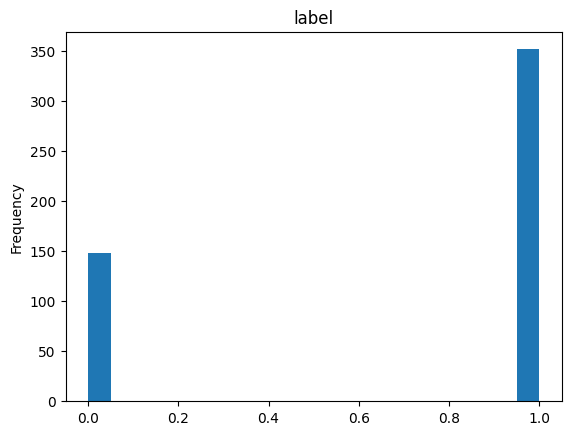

In [6]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')

In [7]:
np.random.seed(42)

In [8]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [9]:
wv = gensim.downloader.load('word2vec-google-news-300')

In [10]:
data = df[['sentence','label']]

In [11]:
def sent_vec(sent):
    vector_size = wv.vector_size #300
    #print(vector_size)
    wv_res = np.zeros(vector_size)
    #print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    #print('_'*50)
    #print(wv_res)
    return wv_res

In [12]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta 

In [13]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'re', 'across', 'same', 'six', 'beside', 'see', 'any', 'your', 'its', 'until', 'himself', 'amongst', "n't", 'thus', 'various', '‘ll', 'name', 'the', 'wherein', 'often', 'anything', 'it', 'an', 'front', 'there', 'without', 'well', 'anywhere', 'while', 'everything', 'third', 'done', 'formerly', 'along', 'still', 'do', 'and', 'each', 'has', 'could', 'yourself', 'we', 'most', 'such', 'everyone', 'wherever', 'everywhere', 'up', '‘re', 'others', 'only', 'toward', 'is', 'under', 'even', 'therein', 'quite', 'of', 'had', 'what', 'at', 'my', 'amount', 'except', 'on', 'four', "'d", 'regarding', 'go', 'fifty', 'which', 'whereafter', 'are', 'her', 'call', 'whole', 'back', 'make', 'was', 'sometime', 'first', 'nor', 'however', 'why', 'side', 'a', 'now', 'otherwise', 'none', 'will', 'very', 'moreover', 'more', 'nine', 'their', 'either', 'another', 'thereupon', 'might', 'for', 'move', 'since', 'itself', 'cannot', 'thru', 'next', 'whereby', 'yours', 'indeed', 'bottom', 'would', 'been', "'re", 'about', 

In [14]:
punctuations = string.punctuation

In [15]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [16]:
data['tokens'] = data['sentence'].apply(spacy_tokenizer)
data.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_8360\943531261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['sentence'].apply(spacy_tokenizer)


,sentence,label,tokens
0,Angela characterized Shelly as a lifesaver.,1,"[angela, characterize, shelly, lifesaver]"
1,They're not finding it a stress being in the s...,1,"[find, stress, office]"
2,Paul exhaled on Mary.,0,"[paul, exhale, mary]"
3,I ordered if John drink his beer.,0,"[order, john, drink, beer]"
4,Press the stamp against the pad completely.,1,"[press, stamp, pad, completely]"


In [17]:
data['vec'] = data['tokens'].apply(sent_vec)
data.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_8360\245105323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vec'] = data['tokens'].apply(sent_vec)


,sentence,label,tokens,vec
0,Angela characterized Shelly as a lifesaver.,1,"[angela, characterize, shelly, lifesaver]","[0.045361328125, -0.040496826171875, -0.072656..."
1,They're not finding it a stress being in the s...,1,"[find, stress, office]","[0.008514404296875, -0.01116943359375, -0.1560..."
2,Paul exhaled on Mary.,0,"[paul, exhale, mary]","[-0.0380859375, 0.0897369384765625, 0.06732177..."
3,I ordered if John drink his beer.,0,"[order, john, drink, beer]","[-0.08662109375, -0.011328125, -0.007421875, 0..."
4,Press the stamp against the pad completely.,1,"[press, stamp, pad, completely]","[-0.030078125, 0.057373046875, -0.122265625, 0..."


In [18]:
embeddings = [embedding for embedding in data['vec']]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

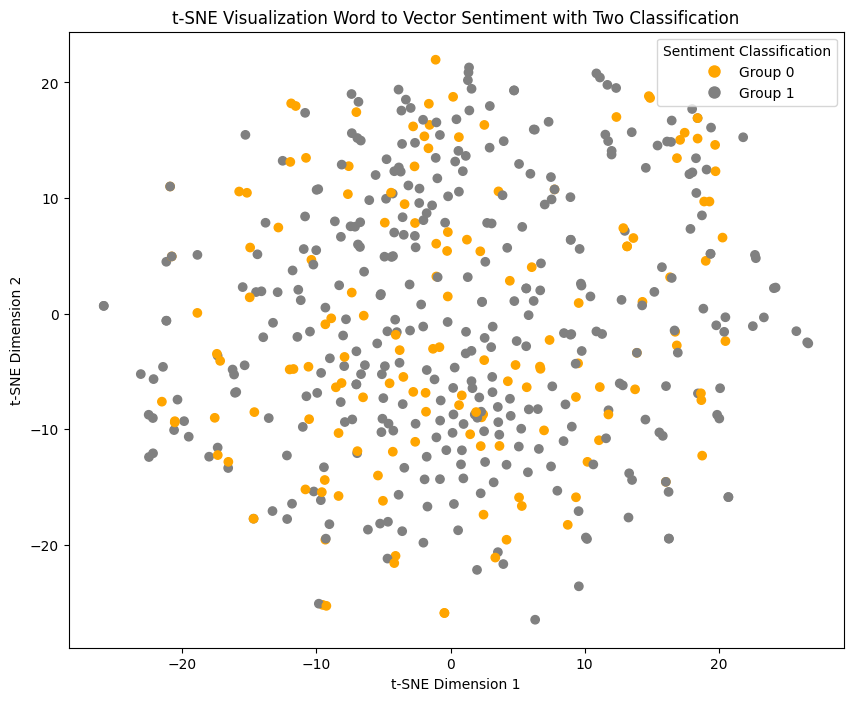

In [19]:
# Plotting
plt.figure(figsize=(10, 8))
colors = ['Orange', 'gray']  # Colors for the two groups
label_names = ['Group 0', 'Group 1']

# Scatter Plot with markers
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=[colors[label] for label in  data['label']], label=label_names, marker='o')

# Manual Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Group 0', markerfacecolor='Orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Group 1', markerfacecolor='gray', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right', title='Sentiment Classification')
plt.title('t-SNE Visualization Word to Vector Sentiment with Two Classification')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [20]:
X = data['vec'].to_list()
y = data['label'].to_list()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [22]:
classifier = LogisticRegression()

In [23]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [24]:
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.6866666666666666
Logistic Regression Precision: 0.7034482758620689
Logistic Regression Recall: 0.9622641509433962
